In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("http://garuda.pythonanywhere.com/static/cancer.csv")

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.shape

(569, 33)

In [19]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [18]:
df.corr().diagnosis

AttributeError: 'DataFrame' object has no attribute 'diagnosis'

<AxesSubplot:>

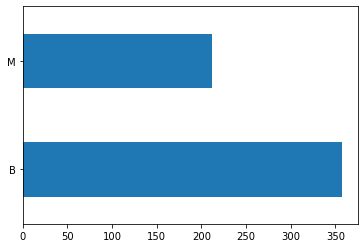

In [37]:
df.diagnosis.value_counts().plot(kind="barh")

<AxesSubplot:>

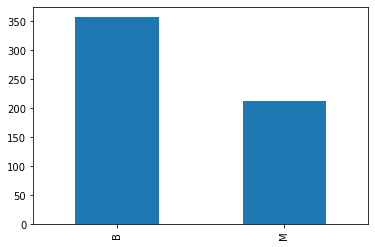

In [36]:
df.diagnosis.value_counts().plot(kind="bar")

In [22]:
y=df.diagnosis

In [29]:
x=df.drop(columns=['diagnosis','id','Unnamed: 32'])

In [ ]:
y

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [170]:
model

LogisticRegression()

In [30]:
model.fit(x,y)

C:\Users\msaiabhinay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
model.score(x,y)

0.9472759226713533

In [183]:
#Actual
model.predict([[6,148,72,35,0,33.6,0.627,50],[1,89,66,23,94,28.1,0.167,21]])

array([1, 0], dtype=int64)

In [ ]:
#Random
model.predict([[6,148,72,35,0,33.6,0.627,50]])

In [32]:
model.coef_

array([[-0.94952293, -0.4593349 , -0.28306102,  0.01621503,  0.03526977,
         0.16626416,  0.23279852,  0.09803806,  0.04885934,  0.00974385,
        -0.04120945, -0.37440748, -0.14438406,  0.11034002,  0.00319145,
         0.03575806,  0.04979444,  0.01276836,  0.01179556,  0.00331942,
        -1.00934087,  0.50568697,  0.25386982,  0.01356693,  0.06400508,
         0.51860472,  0.64541349,  0.18866378,  0.15495947,  0.0498182 ]])

In [33]:
model.intercept_

array([-0.17688273])

In [34]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

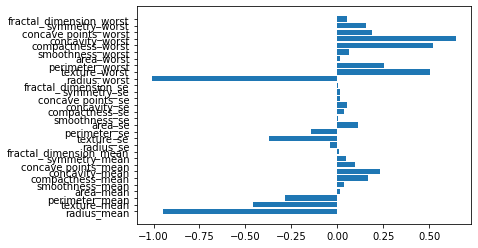

In [39]:
plt.barh(x.columns,model.coef_[0])

In [41]:
#To predict for specific row from input db
model.predict([x.iloc[1]])

array(['M'], dtype=object)

In [42]:
#To predict all rows from input db
model.predict(x)

array(['M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [60]:
df.insert(2,'predict_result') = model.predict(x)

SyntaxError: cannot assign to function call (Temp/ipykernel_12088/2475960989.py, line 1)

In [61]:
predict_result = model.predict(x)

In [63]:
df.insert(2,'result',predict_result)

In [65]:
df

,id,diagnosis,result,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,predict_result
0,842302,M,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,M
1,842517,M,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,M
2,84300903,M,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,M
3,84348301,M,B,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,B
4,84358402,M,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,M
565,926682,M,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,M
566,926954,M,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,M
567,927241,M,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,M
